<a href="https://colab.research.google.com/github/NaveenNKD2001/Image-classification/blob/main/Image_Classification_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [2]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.cifar10.load_data()

In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
test_images.shape

(10000, 32, 32, 3)

In [5]:
def augmentation(batch_images):
  batch_images=tf.image.random_flip_left_right(batch_images)
  batch_images=tf.image.rot90(batch_images,k=tf.random.uniform(shape=[],minval=0,maxval=4,dtype=tf.int32))

  return batch_images.numpy()

In [6]:
n_train_images=train_images/255.0
augmented_train_images=augmentation(train_images)
n_augmented_train_images=augmented_train_images/255.0
n_test_images=test_images/255.0

In [7]:
def mobilenet_model_creation():
  mn=tf.keras.applications.MobileNetV2(weights='imagenet',input_shape=(32,32,3),include_top=False)
  model=tf.keras.Sequential()
  model.add(mn)
  model.add(tf.keras.layers.GlobalAveragePooling2D())

  model.add(tf.keras.layers.Dropout(0.5))

  model.add(tf.keras.layers.Dense(256,'relu'))
  model.add(tf.keras.layers.Dense(128,'relu'))
  model.add(tf.keras.layers.Dense(64,'relu'))
  model.add(tf.keras.layers.Dense(10,'softmax'))

  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

  return model


In [8]:
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=3,min_lr=0.0000001)

#Without Augmentation and Without Noramlized Input

In [9]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('mobilenet.keras',mode='max',monitor='val_accuracy',save_best_only=True)

In [10]:
mn_model=mobilenet_model_creation()
history=mn_model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=50,callbacks=[checkpoint,reduce_lr])

Epoch 1/50
1563/1563 [==============================] - 85s 31ms/step - loss: 1.3633 - accuracy: 0.5335 - val_loss: 1.3168 - val_accuracy: 0.5824 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 46s 30ms/step - loss: 0.9643 - accuracy: 0.6857 - val_loss: 2.7042 - val_accuracy: 0.4926 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8661 - accuracy: 0.7192 - val_loss: 1.2622 - val_accuracy: 0.6464 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 46s 29ms/step - loss: 0.7930 - accuracy: 0.7462 - val_loss: 1.3516 - val_accuracy: 0.6316 - lr: 0.0010
Epoch 5/50
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7257 - accuracy: 0.7669 - val_loss: 1.4120 - val_accuracy: 0.6496 - lr: 0.0010
Epoch 6/50
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6723 - accuracy: 0.7837 - val_loss: 1.0463 - val_accuracy: 0.7156 - lr: 0.0010
Epoch 7/50
1563/1563 [========================

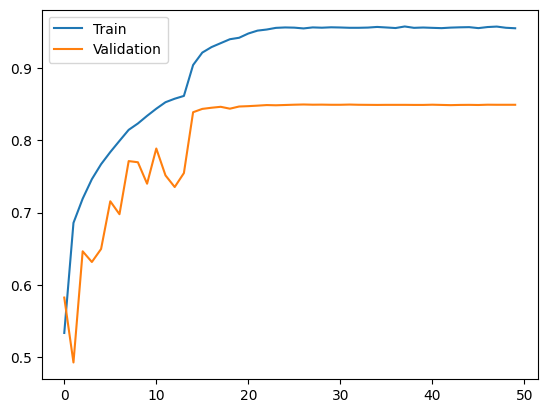

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [12]:
mn_model.load_weights('mobilenet.keras')
mn_model.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.5123 - accuracy: 0.8495


[0.512319803237915, 0.8495000004768372]

In [13]:
y_pred=mn_model.predict(test_images)
y_pred=np.argmax(y_pred,axis=1)

313/313 [==============================] - 3s 6ms/step


In [14]:
print(accuracy_score(y_pred,test_labels))
print(precision_score(y_pred,test_labels,average='weighted'))
print(recall_score(y_pred,test_labels,average='weighted'))

0.8495
0.8491128000000001
0.8495


#Normalized input and output

In [15]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('mobilenet_n.keras',mode='max',save_best_only=True,monitor='val_accuracy')

In [16]:
mn_model_n=mobilenet_model_creation()
history=mn_model_n.fit(n_train_images,train_labels,validation_data=(n_test_images,test_labels),epochs=50,callbacks=[checkpoint,reduce_lr])

Epoch 1/50
1563/1563 [==============================] - 73s 33ms/step - loss: 1.3577 - accuracy: 0.5388 - val_loss: 1.6888 - val_accuracy: 0.4640 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9853 - accuracy: 0.6761 - val_loss: 1.1436 - val_accuracy: 0.6359 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8700 - accuracy: 0.7164 - val_loss: 1.0651 - val_accuracy: 0.6885 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8001 - accuracy: 0.7394 - val_loss: 0.9774 - val_accuracy: 0.7481 - lr: 0.0010
Epoch 5/50
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7378 - accuracy: 0.7614 - val_loss: 1.0355 - val_accuracy: 0.7071 - lr: 0.0010
Epoch 6/50
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6807 - accuracy: 0.7814 - val_loss: 1.0828 - val_accuracy: 0.7078 - lr: 0.0010
Epoch 7/50
1563/1563 [========================

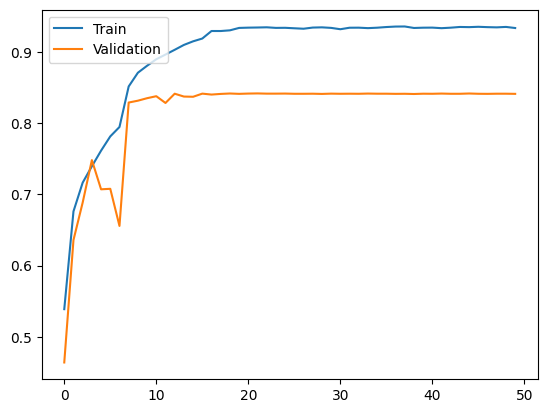

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [18]:
mn_model_n.load_weights('mobilenet_n.keras')
mn_model_n.evaluate(n_test_images,test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.4950 - accuracy: 0.8417


[0.49498608708381653, 0.84170001745224]

In [20]:
y_pred=mn_model_n.predict(n_test_images)
y_pred=np.argmax(y_pred,axis=1)

313/313 [==============================] - 5s 7ms/step


In [21]:
print(accuracy_score(y_pred,test_labels))
print(precision_score(y_pred,test_labels,average='weighted'))
print(recall_score(y_pred,test_labels,average='weighted'))

0.8417
0.8419921
0.8417
